<a href="https://colab.research.google.com/github/Mageshrangarajank/miniproject/blob/main/Bayesian_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

# Define the states of the Markov chain as nodes
class StateNode:
    def __init__(self, name):
        self.name = name
        self.transitions = {}

    def add_transition(self, state, probability):
        self.transitions[state] = probability

# Define the states of the Markov chain
A = StateNode("A")
B = StateNode("B")
C = StateNode("C")

# Define the transition probabilities
A.add_transition(A, 0.7)
A.add_transition(B, 0.2)
A.add_transition(C, 0.1)

B.add_transition(A, 0.3)
B.add_transition(B, 0.4)
B.add_transition(C, 0.3)

C.add_transition(A, 0.1)
C.add_transition(B, 0.2)
C.add_transition(C, 0.7)

# Function to simulate one step of the Markov chain
def markov_step(current_state):
    next_state = random.choices(
        population=list(current_state.transitions.keys()),
        weights=list(current_state.transitions.values()),
    )[0]
    return next_state

# Function to run the Markov chain for a given number of steps
def simulate_markov_chain(initial_state, num_steps):
    current_state = initial_state
    trajectory = [current_state.name]

    for _ in range(num_steps):
        current_state = markov_step(current_state)
        trajectory.append(current_state.name)

    return trajectory

# Simulate the Markov chain for 10 steps starting from state "A"
initial_state = A
num_steps = 10
trajectory = simulate_markov_chain(initial_state, num_steps)

print("Markov Chain Simulation:")
print("Initial State:", initial_state.name)
print("Trajectory:", " -> ".join(trajectory))


Markov Chain Simulation:
Initial State: A
Trajectory: A -> A -> A -> A -> B -> B -> B -> C -> C -> C -> C


In [ ]:
import numpy as np
import random as rm
# The statespace
states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

def activity_forecast(days):
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# Function that forecasts the possible state for the next 2 days
activity_forecast(4)

Start state: Sleep
Possible states: ['Sleep', 'Icecream', 'Run', 'Run', 'Run']
End state after 4 days: Run
Probability of the possible sequence of states: 0.034999999999999996


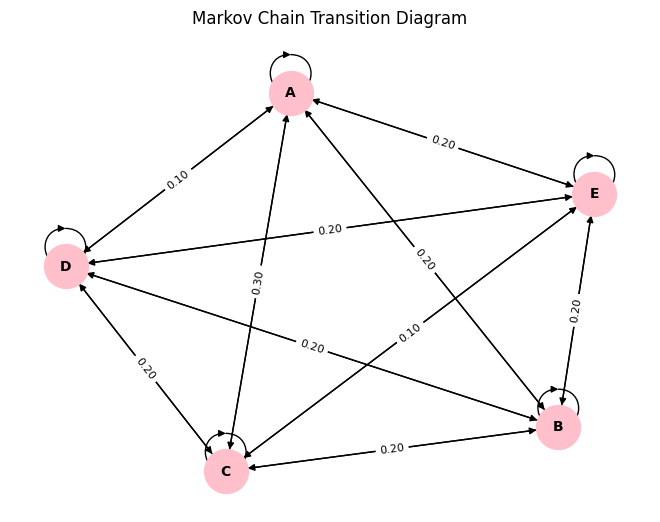

Transition Matrix:
[[0.1 0.3 0.2 0.2 0.1]
 [0.2 0.1 0.4 0.2 0.1]
 [0.3 0.2 0.1 0.1 0.1]
 [0.1 0.2 0.2 0.3 0.2]
 [0.2 0.2 0.1 0.2 0.3]]


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the states (nodes)
states = ["A", "B", "C", "D", "E"]

# Define the transition matrix (replace with your data)
transition_matrix = np.array([
    [0.1, 0.3, 0.2, 0.2, 0.1],
    [0.2, 0.1, 0.4, 0.2, 0.1],
    [0.3, 0.2, 0.1, 0.1, 0.1],
    [0.1, 0.2, 0.2, 0.3, 0.2],
    [0.2, 0.2, 0.1, 0.2, 0.3]
])

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(states)

# Add edges to the graph with labels representing transition probabilities
for i in range(len(states)):
    for j in range(len(states)):
        probability = transition_matrix[i, j]
        if probability > 0:
            G.add_edge(states[i], states[j], label=f"{probability:.2f}")

# Create a layout for the nodes
pos = nx.spring_layout(G, seed=42)

# Draw the nodes and edges with labels
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='pink', font_size=10, font_weight='bold')
edge_labels = {edge: label for edge, label in nx.get_edge_attributes(G, 'label').items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.title("Markov Chain Transition Diagram")
plt.show()

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)

In [ ]:
import numpy as np
I = np.matrix([[0.5, 0.5]])
T = np.matrix([[.7, 0.3],
               [.6, 0.4]])
T1 = I * T
print (T1)
T2 = T1 * T
print (T2)
T3 = T2 * T
print (T3)

[[0.65 0.35]]
[[0.665 0.335]]
[[0.6665 0.3335]]


CPD for X:
+------+-----+
| X(0) | 0.6 |
+------+-----+
| X(1) | 0.4 |
+------+-----+

CPD for Z:
+------+-----+
| Z(0) | 0.7 |
+------+-----+
| Z(1) | 0.3 |
+------+-----+

CPD for Y:
+------+------+------+------+------+
| X    | X(0) | X(0) | X(1) | X(1) |
+------+------+------+------+------+
| Z    | Z(0) | Z(1) | Z(0) | Z(1) |
+------+------+------+------+------+
| Y(0) | 0.9  | 0.8  | 0.7  | 0.1  |
+------+------+------+------+------+
| Y(1) | 0.1  | 0.2  | 0.3  | 0.9  |
+------+------+------+------+------+

Joint Probability Distribution:
+------+------+------+--------------+
| X    | Y    | Z    |   phi(X,Y,Z) |
+======+======+======+==============+
| X(0) | Y(0) | Z(0) |       0.3780 |
+------+------+------+--------------+
| X(0) | Y(0) | Z(1) |       0.1440 |
+------+------+------+--------------+
| X(0) | Y(1) | Z(0) |       0.0420 |
+------+------+------+--------------+
| X(0) | Y(1) | Z(1) |       0.0360 |
+------+------+------+--------------+
| X(1) | Y(0) | Z(0) |       0.

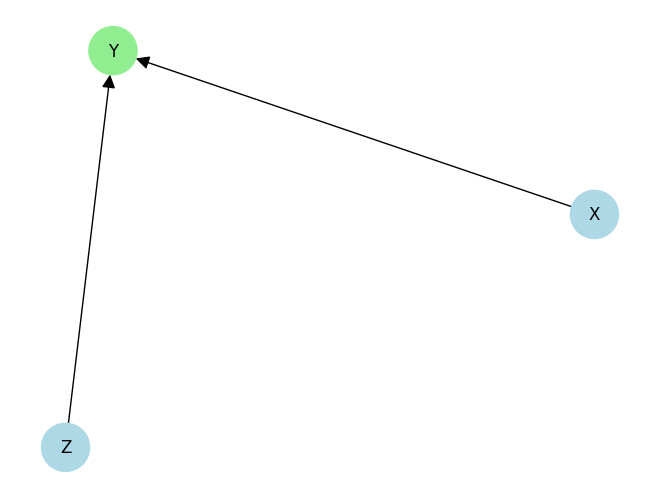

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination

# Define the Bayesian Network
model = BayesianNetwork([('X', 'Y'), ('Z', 'Y')])

# Define Conditional Probability Distributions (CPDs)
cpd_x = TabularCPD(variable='X', variable_card=2, values=[[0.6], [0.4]])
cpd_z = TabularCPD(variable='Z', variable_card=2, values=[[0.7], [0.3]])
cpd_y = TabularCPD(variable='Y', variable_card=2,
                   values=[[0.9, 0.8, 0.7, 0.1], [0.1, 0.2, 0.3, 0.9]],
                   evidence=['X', 'Z'],
                   evidence_card=[2, 2])

# Add CPDs to the model
model.add_cpds(cpd_x, cpd_z, cpd_y)

# Check if the model is valid
assert model.check_model()

# Print CPDs
print("CPD for X:")
print(cpd_x)
print("\nCPD for Z:")
print(cpd_z)
print("\nCPD for Y:")
print(cpd_y)

# Create a directed graph (DiGraph)
dag = nx.DiGraph()

# Add nodes and edges to the DiGraph
dag.add_nodes_from(model.nodes())
dag.add_edges_from(model.edges())

# Position nodes using a spring layout
pos = nx.spring_layout(dag)

# Define node colors
node_colors = {'X': 'lightblue', 'Z': 'lightblue', 'Y': 'lightgreen'}

# Add nodes and edges to the DiGraph with different colors
for node in model.nodes():
    dag.add_node(node, color=node_colors[node])

dag.add_edges_from(model.edges())

# Get node colors from the dictionary
colors = [node_colors[node] for node in dag.nodes()]

# Draw the Bayesian Network as a directed graph with different node colors
nx.draw(dag, pos, with_labels=True, node_color=colors, node_size=1200,
        font_size=12, font_color='black', arrowsize=20)

# Initialize the inference object
inference = VariableElimination(model)

# Calculate joint probabilities
joint_prob = inference.query(variables=['X', 'Y', 'Z'], evidence={})
print("\nJoint Probability Distribution:")
print(joint_prob)

# Show the plot
plt.show()


CPD for Earthquake:
+---------------+-----+
| Earthquake(0) | 0.2 |
+---------------+-----+
| Earthquake(1) | 0.8 |
+---------------+-----+

CPD for Burglary:
+-------------+-----+
| Burglary(0) | 0.3 |
+-------------+-----+
| Burglary(1) | 0.7 |
+-------------+-----+

CPD for Alarm:
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(0) | Earthquake(1) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(0)   | Burglary(1)   | Burglary(0)   | Burglary(1)   |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.9           | 0.7           | 0.8           | 0.1           |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.1           | 0.3           | 0.2           | 0.9           |
+------------+---------------+---------------+---------------+---------------+

Joi

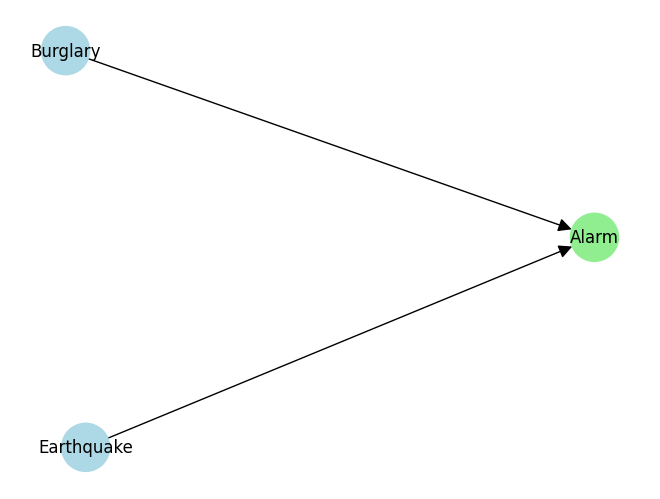

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination

# Define the Bayesian Network
model = BayesianNetwork([('Earthquake', 'Alarm'), ('Burglary', 'Alarm')])

# Define Conditional Probability Distributions (CPDs)
cpd_earthquake = TabularCPD(variable='Earthquake', variable_card=2, values=[[0.2], [0.8]])
cpd_burglary = TabularCPD(variable='Burglary', variable_card=2, values=[[0.3], [0.7]])
cpd_alarm = TabularCPD(variable='Alarm', variable_card=2,
                      values=[[0.9, 0.7, 0.8, 0.1], [0.1, 0.3, 0.2, 0.9]],
                      evidence=['Earthquake', 'Burglary'],
                      evidence_card=[2, 2])

# Add CPDs to the model
model.add_cpds(cpd_earthquake, cpd_burglary, cpd_alarm)

# Check if the model is valid
assert model.check_model()

# Print CPDs
print("CPD for Earthquake:")
print(cpd_earthquake)
print("\nCPD for Burglary:")
print(cpd_burglary)
print("\nCPD for Alarm:")
print(cpd_alarm)

# Create a directed graph (DiGraph)
dag = nx.DiGraph()

# Add nodes and edges to the DiGraph
dag.add_nodes_from(model.nodes())
dag.add_edges_from(model.edges())

# Position nodes using a spring layout
pos = nx.spring_layout(dag)

# Define node colors
node_colors = {'Earthquake': 'lightblue', 'Burglary': 'lightblue', 'Alarm': 'lightgreen'}

# Add nodes and edges to the DiGraph with different colors
for node in model.nodes():
    dag.add_node(node, color=node_colors[node])
dag.add_edges_from(model.edges())

# Get node colors from the dictionary
colors = [node_colors[node] for node in dag.nodes()]

# Draw the Bayesian Network as a directed graph with different node colors
nx.draw(dag, pos, with_labels=True, node_color=colors, node_size=1200,
        font_size=12, font_color='black', arrowsize=20)

# Initialize the inference object
inference = VariableElimination(model)

# Calculate the joint probability of Earthquake and Alarm occurring
joint_probability = inference.query(variables=['Earthquake', 'Alarm'], evidence={})
print("\nJoint Probability of Earthquake and Alarm:")
print(joint_probability)

# Show the plot
plt.show()


In [ ]:
pip install pgmpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.4 MB/s eta 0:00:00


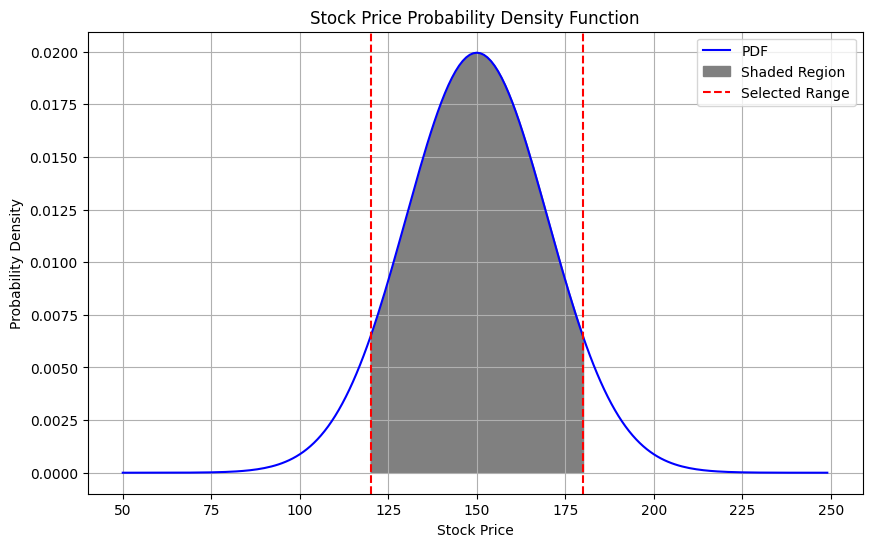

Probability of Stock Price between $120 and $180: 0.8663855974622838


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate

# Define the parameters for the stock price distribution
mean = 150  # Mean stock price
std_dev = 20  # Standard deviation of stock price

# Define the range of possible stock prices
stock_price_range = np.arange(50, 250)

# Calculate the probability density function (PDF) using the normal distribution
pdf_values = norm.pdf(stock_price_range, mean, std_dev)

# Define the range for which you want to calculate the probability
lower_bound = 120
upper_bound = 180

# Calculate the probability of stock price being between 120 and 180 using integration
def probability_function(x):
    return norm.pdf(x, mean, std_dev)

probability_within_range, _ = integrate.quad(probability_function, lower_bound, upper_bound)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(stock_price_range, pdf_values, color='blue', label='PDF')

# Shade the region between 120 and 180
plt.fill_between(stock_price_range, pdf_values, where=(stock_price_range >= lower_bound) & (stock_price_range <= upper_bound),
                 color='gray', label='Shaded Region')

# Highlight the selected range
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Selected Range')
plt.axvline(x=upper_bound, color='red', linestyle='--')
plt.xlabel('Stock Price')
plt.ylabel('Probability Density')
plt.title('Stock Price Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

print("Probability of Stock Price between $120 and $180:", probability_within_range)

